In [1]:
import pandas as pd
import numpy as np

# librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# para calcular las métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

import pickle

In [2]:
id= "only for test & sample submission files, id for prediction sample identification"
price= "price in USD"
carat= "weight of the diamond"
cut= "quality of the cut (Fair, Good, Very Good, Premium, Ideal)"
color= "diamond colour"
clarity= "a measurement of how clear the diamond is"
x= "length in mm"
y= "width in mm"
z= "depth in mm"
depth= "total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)"
table= "width of top of diamond relative to widest point (43--95)"

In [3]:
df = pd.read_csv("data/train2.csv")

## Encoding

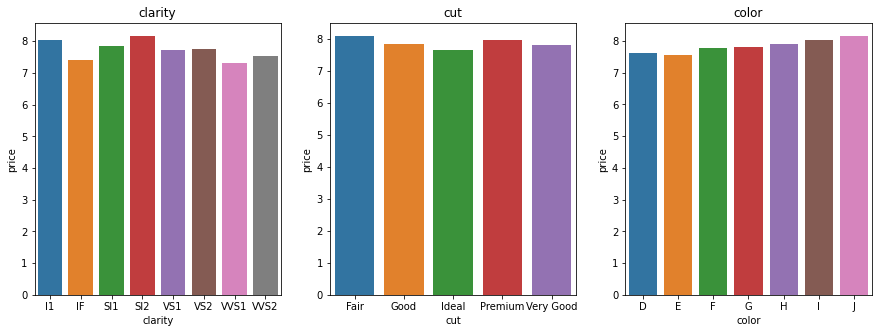

In [4]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

# Hacemos un bucle for para graficar cada columna en un subgráfico diferente
for i, columna in enumerate(["clarity", "cut", "color"]):
    df_relacion_cate = df.groupby(columna)["price"].mean().reset_index()
    sns.barplot(data=df_relacion_cate, x=columna, y="price", ax=axs[i])
    axs[i].set_title(columna)

# Mostramos la figura
plt.show()

In [5]:
columnas_object = df.select_dtypes(include="object").columns
for i in columnas_object:
    print(f"{i} : {df[i].unique()}")

cut : ['Premium' 'Ideal' 'Very Good' 'Fair' 'Good']
color : ['D' 'E' 'F' 'G' 'H' 'I' 'J']
clarity : ['SI2' 'VVS2' 'VS2' 'VS1' 'SI1' 'VVS1' 'IF' 'I1']


In [6]:
orden_cut = ['Ideal', 'Good', 'Very Good','Premium' , 'Fair' ]
orden_color = ['E','D',  'F', 'G', 'H', 'I', 'J']
orden_clarity = ['VVS1','IF','VS1','SI1','SI2','VS2','I1', 'VVS2'] 

In [7]:
def ordinal_encoder(orden, df, columna):
    ordinal = OrdinalEncoder(categories = [orden], dtype = int)
    transformados_oe = ordinal.fit_transform(df[[columna]])
    df[columna] = transformados_oe
    
    with open(f'data/encoding{columna}.pkl', 'wb') as s:
        pickle.dump(ordinal, s)
    return df

In [8]:
df = ordinal_encoder(orden_cut, df, "cut")
df = ordinal_encoder(orden_color, df, "color")
df = ordinal_encoder(orden_clarity, df, "clarity")

In [9]:
df.head()

,Unnamed: 0,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0,0.30,3,1,4,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1,1.01,0,0,7,62.7,56.0,6.42,6.46,4.04,9.183
2,2,2,0.72,0,2,5,61.8,59.0,5.71,5.74,3.54,7.983
3,3,3,1.08,2,3,4,63.2,57.0,6.54,6.50,4.12,8.371
4,4,4,0.36,3,3,2,62.3,59.0,4.50,4.55,2.82,6.588


## Estandarización

In [10]:
df.select_dtypes(include=np.number).columns

Index(['Unnamed: 0', 'id', 'carat', 'cut', 'color', 'clarity', 'depth',
       'table', 'x', 'y', 'z', 'price'],
      dtype='object')

In [11]:
#las que tenemos que estandarizar:
df_standar=df[['carat', 'depth', 'table', 'x', 'y',
       'z']]

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(df_standar)
X_escaladas = scaler.transform(df_standar)
df[df_standar.columns] = X_escaladas
df.head()

,Unnamed: 0,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0,-1.045473,3,1,4,0.454922,0.245377,-1.261220,-1.258153,-1.205849,6.353
1,1,1,0.446332,0,0,7,0.663723,-0.649661,0.613952,0.629644,0.706968,9.183
2,2,2,-0.162997,0,2,5,0.037321,0.692896,-0.017031,0.006152,0.003726,7.983
3,3,3,0.593412,2,3,4,1.011723,-0.202142,0.720596,0.664283,0.819486,8.371
4,4,4,-0.919405,3,3,2,0.385322,0.692896,-1.092366,-1.024343,-1.008941,6.588


In [14]:
with open('data/estandarizacion.pkl', 'wb') as s:
    pickle.dump(scaler, s)

In [15]:
df.drop("Unnamed: 0",axis=1, inplace=True)

In [16]:
df_standar_price=df[["price"]]
df_standar_price.head()

,price
0,6.353
1,9.183
2,7.983
3,8.371
4,6.588


In [18]:
df.to_csv("data/train_sinprecio.csv", index=False)